## Goal: Map visualisation
### Exploring and Visualizing the Volume of Crime Statistics by Postcode Regions

In [ ]:
import pandas as pd
import glob #Library to combine csv files

__Overview__

In [ ]:
# List of CSV files
csv_files = [
    "2022-23_data_sa_crime.csv",
    "2021-22-data-sa-crime-q1-q4.csv",
    "2020-21_data_sa_crime.csv",
    "2019-20-fullyr-data_sa_crime.csv",
    "2018-19-data_sa_crime.csv"
]

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Read and concatenate the CSV files
for file in csv_files:
    df = pd.read_csv(file)
    combined_data = pd.concat([combined_data, df], ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combined_data.head())

# Save the combined data to a new CSV file
combined_data.to_csv("combined_crime_data.csv", index=False)


  Reported Date Suburb - Incident Postcode - Incident  \
0    01/07/2022          ADELAIDE                5000   
1    01/07/2022          ADELAIDE                5000   
2    01/07/2022          ADELAIDE                5000   
3    01/07/2022          ADELAIDE                5000   
4    01/07/2022          ADELAIDE                5000   

  Offence Level 1 Description           Offence Level 2 Description  \
0   OFFENCES AGAINST PROPERTY  FRAUD DECEPTION AND RELATED OFFENCES   
1   OFFENCES AGAINST PROPERTY     PROPERTY DAMAGE AND ENVIRONMENTAL   
2   OFFENCES AGAINST PROPERTY     PROPERTY DAMAGE AND ENVIRONMENTAL   
3   OFFENCES AGAINST PROPERTY             SERIOUS CRIMINAL TRESPASS   
4   OFFENCES AGAINST PROPERTY            THEFT AND RELATED OFFENCES   

                   Offence Level 3 Description  Offence count  
0  Other fraud, deception and related offences            1.0  
1                                     Graffiti            1.0  
2      Other property damage and envir

In [ ]:
# Check for null values in the combined dataset
null_values = combined_data.isnull().sum()

# Display the shape of the combined dataset
print("\nShape of the combined dataset:")
print(combined_data.shape)

# Display information about the dataset, including data types and non-null counts
print("\nInformation about the combined dataset:")
print(combined_data.info())

# Display the summary statistics of the numerical columns
print("\nSummary statistics of the combined dataset:")
print(combined_data.describe())

# Display the count of unique values in each column
print("\nCount of unique values in each column:")
print(combined_data.nunique())

# Display the count of null values in each column
print("\nCount of null values in each column:")
print(null_values)


Shape of the combined dataset:
(463510, 7)

Information about the combined dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463510 entries, 0 to 463509
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Reported Date                463508 non-null  object 
 1   Suburb - Incident            460619 non-null  object 
 2   Postcode - Incident          460082 non-null  object 
 3   Offence Level 1 Description  463508 non-null  object 
 4   Offence Level 2 Description  463508 non-null  object 
 5   Offence Level 3 Description  463508 non-null  object 
 6   Offence count                463508 non-null  float64
dtypes: float64(1), object(6)
memory usage: 24.8+ MB
None

Summary statistics of the combined dataset:
       Offence count
count  463508.000000
mean        1.216324
std         0.724698
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max

___Formatting___

The aim of this small project is to present a comprehensive and visually insightful analysis of crime statistics, shedding light on the volume and distribution of incidents across various regions outlined by postcodes.
Therefore, to fulfill this objective, we must ensure robust data via null detection, correct variable formats, and we will also initiate the process of formatting CSV files. In this process, we will combine the primary key (postcode) with the two accompanying attributes, latitude and longitude statistics (from another CSV file), ensuring a cohesive representation of geographical data for a more effective analysis of crime statistics. 

In [ ]:
# Load Australian postcodes data
australian_postcodes = pd.read_csv('australian_postcodes.csv')

# Extract relevant columns
postcodes_postcode_column = 'postcode'

# Format the 'postcode' column in Australian postcodes data to have a maximum of four numbers
australian_postcodes[postcodes_postcode_column] = australian_postcodes[postcodes_postcode_column].apply(lambda x: str(x).zfill(4)[-4:])

# Display the first few rows of the modified Australian Postcodes DataFrame
print("\nModified Australian Postcodes Data:")
print(australian_postcodes.head())



Modified Australian Postcodes Data:
      id postcode                        locality state       long        lat  \
0    230     0200                             ANU   ACT  149.11900 -35.277700   
1  21820     0200  Australian National University   ACT  149.11890 -35.277700   
2    232     0800                          DARWIN    NT  130.83668 -12.458684   
3  24049     0800                     DARWIN CITY    NT  130.83668 -12.458684   
4    233     0801                          DARWIN    NT  130.83668 -12.458684   

    dc type              status      sa3  ... MMM_2019  ced altitude  \
0  NaN  NaN  Updated 3-Dec-2022      NaN  ...      1.0  NaN      NaN   
1  NaN  NaN  Updated 3-Dec-2022      NaN  ...      1.0  NaN      NaN   
2  NaN  NaN  Updated 3-Dec-2022  70101.0  ...      2.0  NaN      NaN   
3  NaN  NaN  Updated 3-Dec-2022  70101.0  ...      2.0  NaN      NaN   
4  NaN  NaN  Updated 3-Dec-2022  70101.0  ...      2.0  NaN      NaN   

  chargezone  phn_code            phn_name 

In [ ]:
# Load Australian postcodes data
australian_postcodes = pd.read_csv('australian_postcodes.csv')

# Extract relevant columns
postcodes_postcode_column = 'postcode'

# Format the 'postcode' column in Australian postcodes data to have a maximum of four numbers
australian_postcodes[postcodes_postcode_column] = australian_postcodes[postcodes_postcode_column].apply(lambda x: str(x).zfill(4)[-4:])

# Filter Australian postcodes data for postcodes between 5000 and 5999
filtered_postcodes = australian_postcodes[(australian_postcodes['postcode'].astype(int) >= 5000) & (australian_postcodes['postcode'].astype(int) <= 5999)]

# Drop duplicates to ensure distinct postcodes
distinct_postcodes = filtered_postcodes.drop_duplicates(subset=['postcode'])

# Display the first few rows of the distinct postcodes DataFrame
print("\nDistinct Postcodes DataFrame:")
print(distinct_postcodes[['postcode', 'long', 'lat']])

distinct_postcodes.to_csv("distinct_postcodes.csv", index=False)


Distinct Postcodes DataFrame:
      postcode        long        lat
13662     5000  138.608637 -34.937459
13671     5001  139.273782 -35.120097
13672     5005  138.603510 -34.919398
13675     5006  138.584497 -34.911523
13677     5007  138.567870 -34.903259
...        ...         ...        ...
15729     5801    0.000000   0.000000
15730     5810  139.273782 -35.120097
15731     5839  139.273782 -35.120097
15732     5942  138.565906 -34.860017
15733     5950  138.530183 -34.945146

[349 rows x 3 columns]


In [ ]:
# Assuming 'Postcode - Incident' is the common column between combined_data and distinct_postcodes
combined_data['Postcode - Incident'] = combined_data['Postcode - Incident'].astype(str).str.zfill(4)

# Merge combined_data with distinct_postcodes based on the 'Postcode - Incident' column
combined_data_with_coordinates = pd.merge(combined_data, distinct_postcodes[['postcode', 'long', 'lat']], left_on='Postcode - Incident', right_on='postcode', how='left')

# Display the first few rows of the merged DataFrame
print("\nCombined Data with Coordinates:")
print(combined_data_with_coordinates.head())

# Save the merged DataFrame to a new CSV file
combined_data_with_coordinates.to_csv("combined_data_with_coordinates.csv", index=False)



Combined Data with Coordinates:
  Reported Date Suburb - Incident Postcode - Incident  \
0    01/07/2022          ADELAIDE                5000   
1    01/07/2022          ADELAIDE                5000   
2    01/07/2022          ADELAIDE                5000   
3    01/07/2022          ADELAIDE                5000   
4    01/07/2022          ADELAIDE                5000   

  Offence Level 1 Description           Offence Level 2 Description  \
0   OFFENCES AGAINST PROPERTY  FRAUD DECEPTION AND RELATED OFFENCES   
1   OFFENCES AGAINST PROPERTY     PROPERTY DAMAGE AND ENVIRONMENTAL   
2   OFFENCES AGAINST PROPERTY     PROPERTY DAMAGE AND ENVIRONMENTAL   
3   OFFENCES AGAINST PROPERTY             SERIOUS CRIMINAL TRESPASS   
4   OFFENCES AGAINST PROPERTY            THEFT AND RELATED OFFENCES   

                   Offence Level 3 Description  Offence count postcode  \
0  Other fraud, deception and related offences            1.0     5000   
1                                     Graffiti   

__Visualisations__

Matplotlib created a temporary cache directory at C:\Users\calmr\AppData\Local\Temp\matplotlib-4jhf36y8 because the default path (C:\Users\calmr\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


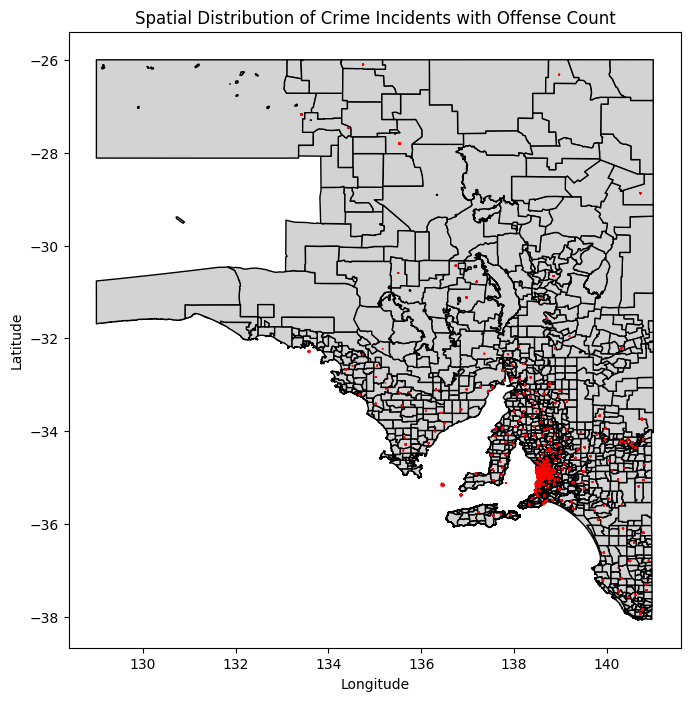

In [ ]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load combined data with coordinates
combined_data_with_coordinates = pd.read_csv("combined_data_with_coordinates.csv")

# Create a GeoDataFrame
geometry = gpd.points_from_xy(combined_data_with_coordinates['long'], combined_data_with_coordinates['lat'])
gdf = gpd.GeoDataFrame(combined_data_with_coordinates, geometry=geometry)

# Specify the path to the folder containing shapefiles
shapefile_folder_path = r"C:\Users\calmr\Downloads\Suburbs_shp"

# Choose a specific shapefile from the folder
# For example, if the shapefile representing suburbs is named 'Suburbs_GDA94.shp'
base_map_path = os.path.join(shapefile_folder_path, "Suburbs_GDA94.shp")

# Load the selected shapefile as the base map
base_map = gpd.read_file(base_map_path)

# Plot the spatial data with offense count as marker size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the base map (if available)
if 'base_map' in locals():
    base_map.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot the crime incidents with marker size based on offense count
gdf.plot(ax=ax, marker='o', color='red', markersize=gdf['Offence count']/10, alpha=0.5)

# Customize the plot
ax.set_title('Spatial Distribution of Crime Incidents with Offense Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
# __Data Dictionary__                         
# Create a data dictionary template
data_dict_template = pd.DataFrame(columns=['Variable', 'Variable Name', 'Measured Unit', 'Allowed Values', 'Description'])

# List of variable names
variable_names = ['Reported Date', 'Suburb - Incident', 'Postcode - Incident', 'Offence Level 1 Description', 'Offence Level 2 Description', 'Offence Level 3 Description', 'Offence count']

# Fill in the template with variable names
data_dict_template['Variable'] = variable_names

# Fill in specific details for 'Reported Date'
data_dict_template.at[0, 'Variable Name'] = "Reported Date"
data_dict_template.at[0, 'Measured Unit'] = "Date"
data_dict_template.at[0, 'Allowed Values'] = "dd/mm/yyyy"
data_dict_template.at[0, 'Description'] = "Date of reported incident"

# Fill in the details for other variables
for i in range(1, len(variable_names)):
    data_dict_template.at[i, 'Variable Name'] = variable_names[i]
    # Fill in other details as needed

# Display the data dictionary template as a Markdown table
markdown_table = data_dict_template.to_markdown(index=False)

# Print the Markdown table
print(markdown_table)


| Variable                    | Variable Name               | Measured Unit   | Allowed Values   | Description               |
|:----------------------------|:----------------------------|:----------------|:-----------------|:--------------------------|
| Reported Date               | Reported Date               | Date            | dd/mm/yyyy       | Date of reported incident |
| Suburb - Incident           | Suburb - Incident           | nan             | nan              | nan                       |
| Postcode - Incident         | Postcode - Incident         | nan             | nan              | nan                       |
| Offence Level 1 Description | Offence Level 1 Description | nan             | nan              | nan                       |
| Offence Level 2 Description | Offence Level 2 Description | nan             | nan              | nan                       |
| Offence Level 3 Description | Offence Level 3 Description | nan             | nan              | nan         